In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn sklearn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Data Exploration and Preprocessing
# Load the dataset
df = pd.read_excel('hotel_bookings.xlsx')

In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
# Check for missing values
print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Handle missing values (example: fill with median for numeric columns only)
for column in df.select_dtypes(include=['number']):
    df[column] = df[column].fillna(df[column].median())

In [ ]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])


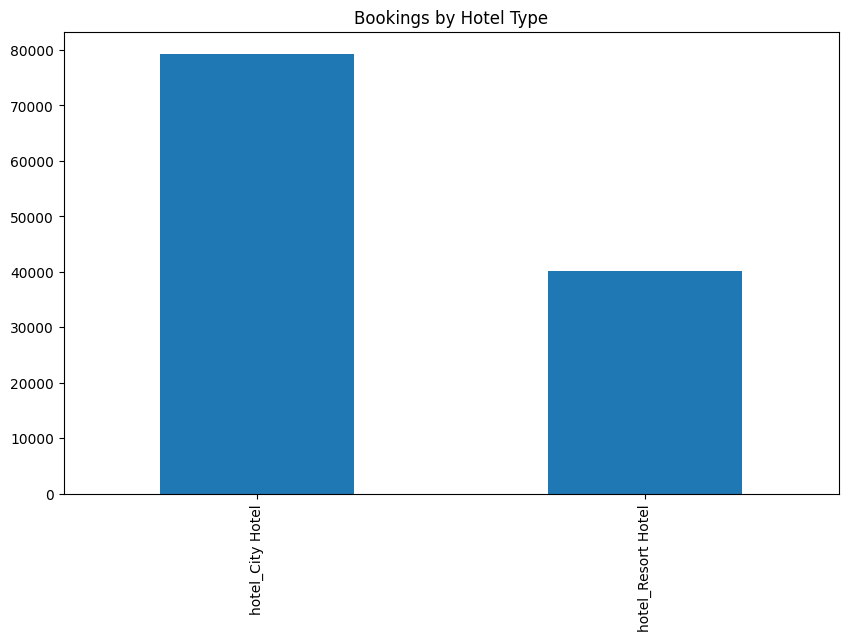

In [ ]:
# 2. Descriptive Analysis
# Analyze booking patterns by hotel type
# Since 'hotel' is now one-hot encoded, we need to sum across relevant columns
hotel_bookings = df.filter(regex='^hotel_').sum()

plt.figure(figsize=(10,6))
hotel_bookings.plot(kind='bar')
plt.title('Bookings by Hotel Type')
plt.show()

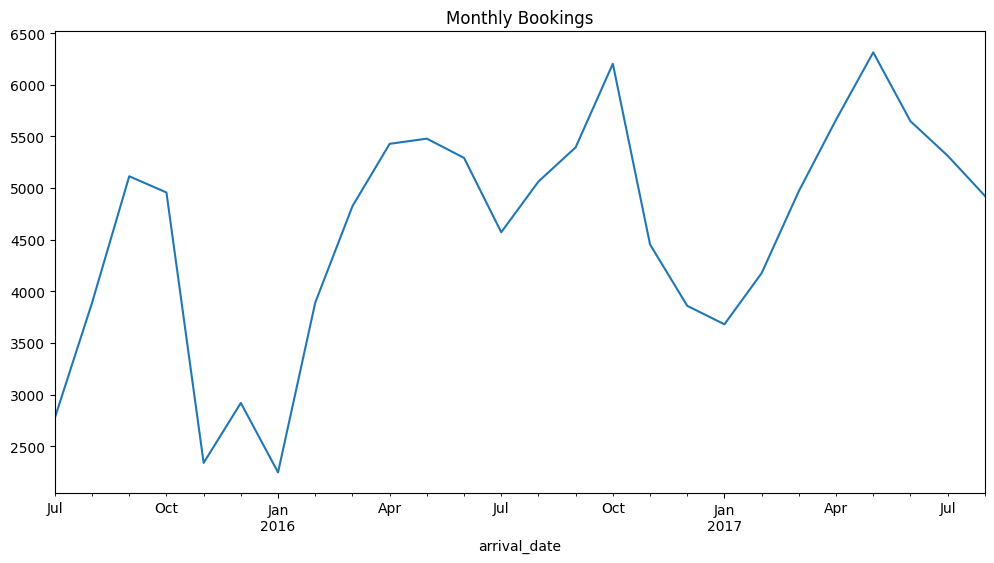

In [ ]:
# Explore seasonality in bookings
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
plt.figure(figsize=(12,6))
monthly_bookings.plot()
plt.title('Monthly Bookings')
plt.show()

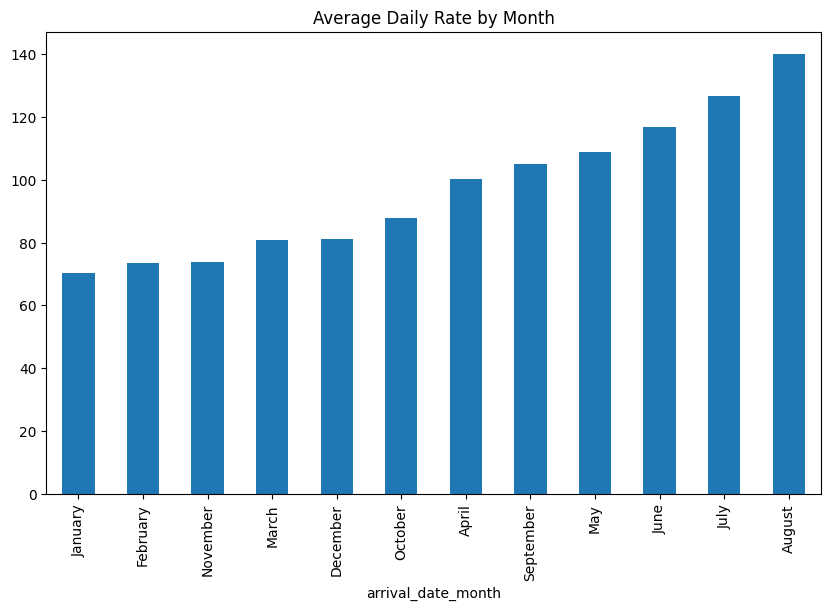

In [ ]:
# 3. Best Time to Book
# Analyze average daily rate (ADR) by month
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().sort_values()
plt.figure(figsize=(10,6))
monthly_adr.plot(kind='bar')
plt.title('Average Daily Rate by Month')
plt.show()

In [ ]:
print(df.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       ...
       'assigned_room_type_L', 'assigned_room_type_P',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'arrival_date'],
      dtype='object', length=250)


In [ ]:
df['stays_total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
print(df)

        is_canceled  lead_time  arrival_date_year arrival_date_month  \
0                 0        342               2015               July   
1                 0        737               2015               July   
2                 0          7               2015               July   
3                 0         13               2015               July   
4                 0         14               2015               July   
...             ...        ...                ...                ...   
119385            0         23               2017             August   
119386            0        102               2017             August   
119387            0         34               2017             August   
119388            0        109               2017             August   
119389            0        205               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1        

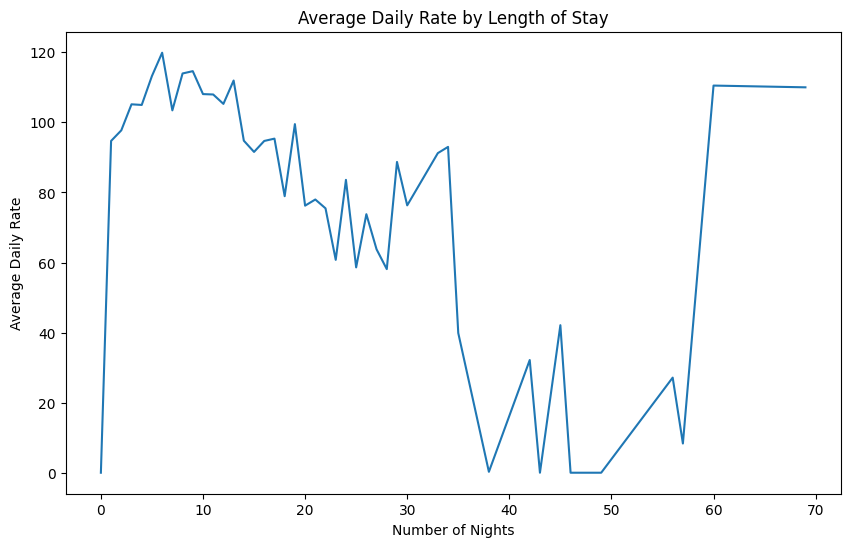

In [ ]:
# 4. Optimal Length of Stay
# Calculate average daily rate for different lengths of stay
stay_adr = df.groupby('stays_total_nights')['adr'].mean()
plt.figure(figsize=(10,6))
stay_adr.plot()
plt.title('Average Daily Rate by Length of Stay')
plt.xlabel('Number of Nights')
plt.ylabel('Average Daily Rate')
plt.show()

In [ ]:
# 5. Special Requests Prediction
# Prepare the data
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1)
y = df['total_of_special_requests'] > 0  # Binary classification: any special requests or not


In [ ]:
# Handle categorical features (example using one-hot encoding)
X = pd.get_dummies(X, columns=['arrival_date_month']) # Replace 'arrival_date_month' with the actual column name containing 'May'


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14128
        True       1.00      1.00      1.00      9750

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

[[14128     0]
 [    0  9750]]


In [ ]:
# Identify key predictors
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))


                            feature  importance
18        total_of_special_requests   12.768982
239         deposit_type_Non Refund    0.327988
238         deposit_type_No Deposit    0.324933
209        market_segment_Online TA    0.214039
207           market_segment_Groups    0.197289
208    market_segment_Offline TA/TO    0.088997
10           previous_cancellations    0.081945
1                 arrival_date_year    0.069681
8                            babies    0.063034
11   previous_bookings_not_canceled    0.061578


In [ ]:
# 6. Additional Analyses
# Examine cancellation patterns
cancellation_rate = df['is_canceled'].mean()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")


Overall cancellation rate: 37.04%


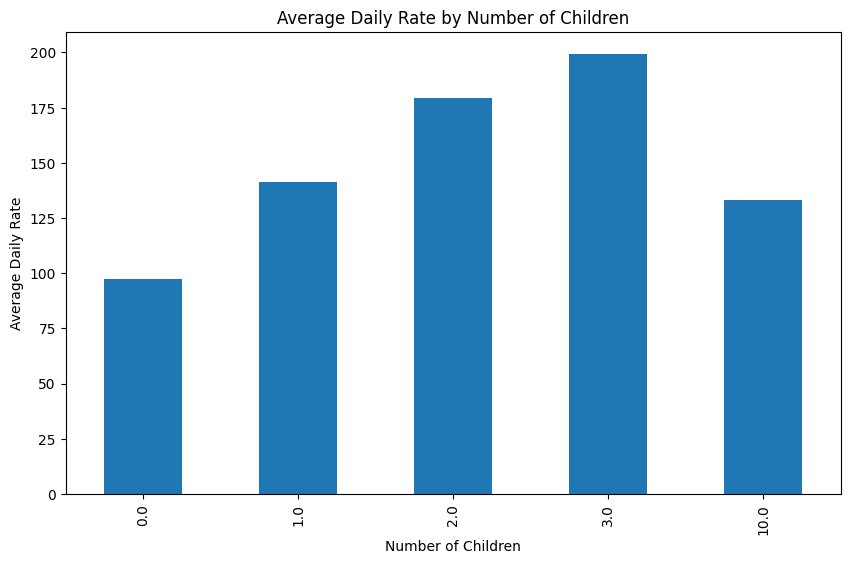

In [ ]:
# Analyze the impact of children/babies on bookings
child_impact = df.groupby('children')['adr'].mean()
plt.figure(figsize=(10,6))
child_impact.plot(kind='bar')
plt.title('Average Daily Rate by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Daily Rate')
plt.show()

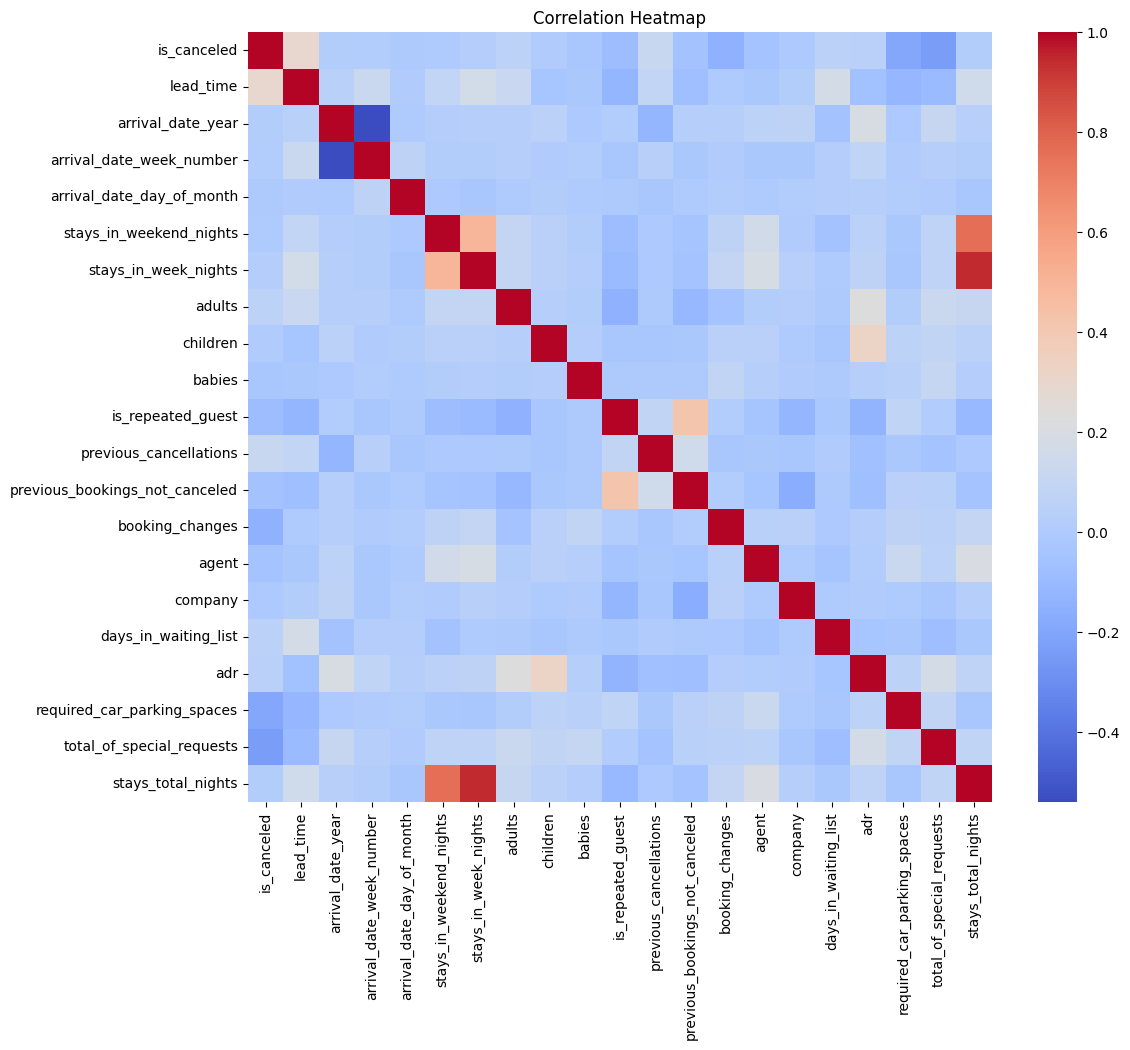

In [ ]:
# 7. Visualization and Reporting
# Create a correlation heatmap
plt.figure(figsize=(12,10))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 8. Advanced Analytics (example: customer segmentation)
from sklearn.cluster import KMeans

In [ ]:
# Select features for clustering
cluster_features = ['lead_time', 'adr', 'total_of_special_requests', 'stays_total_nights']
X_cluster = df[cluster_features]

In [ ]:
# Scale the features
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)


In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


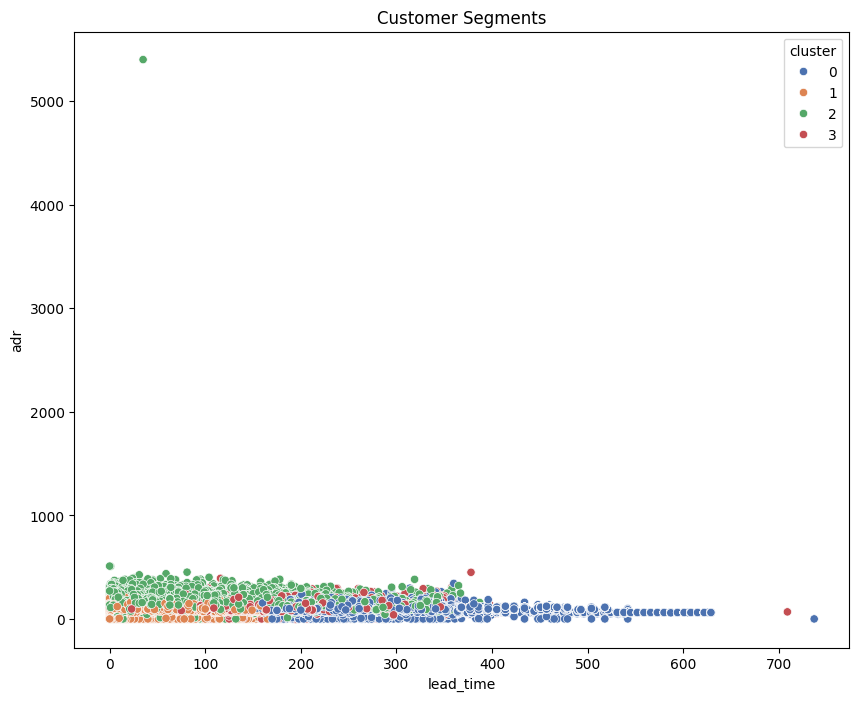

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='cluster', palette='deep')
plt.title('Customer Segments')
plt.show()

In [ ]:
# Summarize cluster characteristics
print(df.groupby('cluster')[cluster_features].mean())

          lead_time         adr  total_of_special_requests  stays_total_nights
cluster                                                                       
0        275.037517   89.425168                   0.200629            2.949808
1         47.312027   87.131667                   0.229253            2.448543
2         72.201914  141.882691                   1.567423            3.290223
3        131.289113   99.325602                   0.511311            8.483637


# **----------------------------------------------------------------------------------------------------**